In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

In [2]:
iris = pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\week7\iris_missing.csv")
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal_Length  148 non-null    float64
 1   Sepal_Width   147 non-null    float64
 2   Petal_Length  150 non-null    float64
 3   Petal_Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
#summary statistic
iris.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,148.000000,147.000000,150.000000,150.000000
mean,5.845270,3.055102,3.758667,1.198667
std,0.833429,0.437957,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
#Mencari persentase data missing
nulls= iris.isnull().sum()
nulls_percentage = nulls[nulls!=0]/iris.shape[0]*100
print(round(nulls_percentage,2))

Sepal_Length    1.33
Sepal_Width     2.00
dtype: float64


In [6]:
iris[iris.isna().any(axis=1)]

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
66,NaN,NaN,4.5,1.5,Iris-versicolor
82,NaN,2.7,3.9,1.2,Iris-versicolor
127,6.1,NaN,4.9,1.8,Iris-virginica
135,7.7,NaN,6.1,2.3,Iris-virginica


In [7]:
df_drop=iris.dropna()
df_drop.shape

(146, 5)

In [8]:
df_konstan=iris.fillna(0) #fill Nan with  zero
df_konstan.shape

(150, 5)

In [9]:
df_mean=iris.fillna(iris.mean()) #fill NaN with mean
df_mean.shape

C:\Users\Darren\AppData\Local\Temp\ipykernel_14012\2465038516.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean=iris.fillna(iris.mean()) #fill NaN with mean


(150, 5)

<AxesSubplot:>

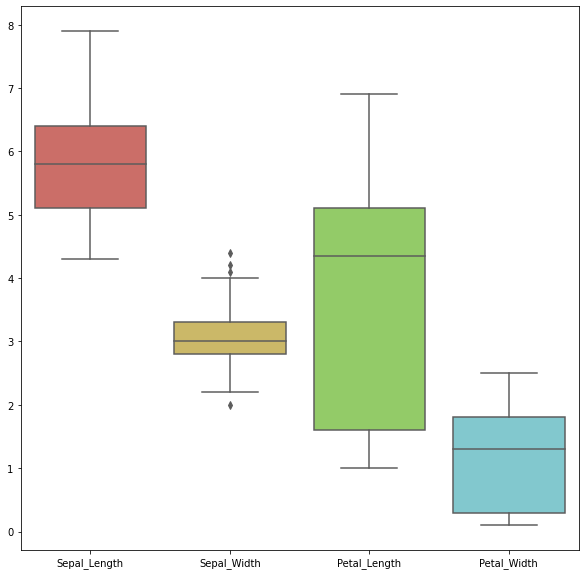

In [10]:
fig, ax= plt.subplots(figsize=(10,10))
sns.boxplot(data=iris, palette=('#db5f57','#dbc257','#91db57','#75d3db'))


In [11]:
#select data with outliers, will be resolved using Score

data_sepal= iris[['Sepal_Width']]
data_sepal

,Sepal_Width
0,3.5
1,3.0
2,3.2
3,3.1
4,3.6
...,...
145,3.0
146,2.5
147,3.0
148,3.4


In [12]:
stats.zscore(data_sepal, nan_policy='omit')

,Sepal_Width
0,1.019322
1,-0.126246
2,0.331981
3,0.102867
4,1.248436
...,...
145,-0.126246
146,-1.271815
147,-0.126246
148,0.790209


In [13]:
#get data inside 3 sigma

data_zscore=data_sepal[(np.abs(stats.zscore(data_sepal, nan_policy='omit')) < 3).all(axis=1)]
data_zscore.shape

(146, 1)

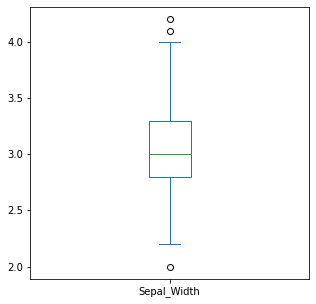

In [14]:
data_zscore.plot(kind='box', figsize=(5,5))
plt.show()

In [15]:
#handling outlier with IQR

#Q1, Q3 dan interquartile range
Q1 = data_sepal.quantile(q=.25)
Q3 = data_sepal.quantile(q=.75)
IQR = Q3-Q1 #IQR=Q3-Q1 or use stats.iqr from scipy

#take value 1.5*IQR from Qi and Q3
data_iqr= data_sepal[~((data_sepal < (Q1-1.5*IQR)) | (data_sepal > (Q3+1.5*IQR))).any(axis=1)]
data_iqr.shape

(146, 1)

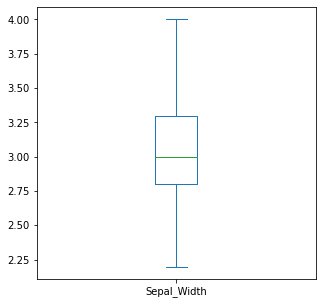

In [16]:
data_iqr.plot(kind='box', figsize=(5,5))
plt.show()

In [17]:
data_zscore.columns = ['Z-Score']
data_iqr.columns=['IQR']

In [18]:
result=pd.concat([data_sepal, data_zscore,data_iqr], axis=1)

<AxesSubplot:>

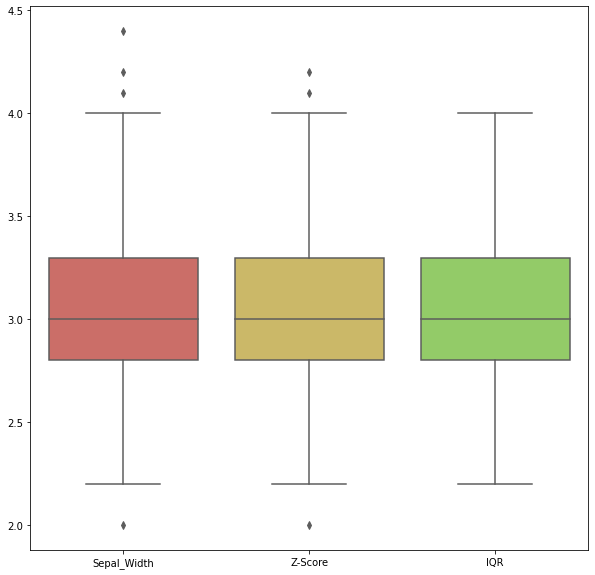

In [19]:
fig, ax= plt.subplots(figsize=(10,10))
sns.boxplot(data=result, palette=('#db5f57','#dbc257','#91db57'))

In [20]:
#Train test split, basic for next week about machine learning, especially classification

import numpy as np
from sklearn.model_selection import train_test_split

In [21]:
iris

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [22]:
x= iris[['Sepal_Width','Sepal_Length','Petal_Width','Petal_Length']]
y= iris[['Species']]

In [23]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.3, random_state=5)

In [24]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

(105, 4) (45, 4)
(105, 1) (45, 1)


In [150]:
#Encoding, we need to get teh superstore data first

superstore= pd.read_csv("D:\SEMESTER3\DATAANAYSIS\lab\week7\superstore_sales.csv")
superstore.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680


In [48]:
superstore.groupby('State')['Row ID'].nunique()

State
Alabama                   61
Arizona                  223
Arkansas                  60
California              1946
Colorado                 179
Connecticut               82
Delaware                  93
District of Columbia      10
Florida                  373
Georgia                  177
Idaho                     21
Illinois                 483
Indiana                  135
Iowa                      26
Kansas                    24
Kentucky                 137
Louisiana                 41
Maine                      8
Maryland                 105
Massachusetts            135
Michigan                 253
Minnesota                 89
Mississippi               53
Missouri                  66
Montana                   15
Nebraska                  38
Nevada                    39
New Hampshire             27
New Jersey               122
New Mexico                37
New York                1097
North Carolina           247
North Dakota               7
Ohio                     454
Oklahoma

In [52]:
superstore.groupby('Category')['Row ID'].nunique()

Category
Furniture          2078
Office Supplies    5909
Technology         1813
Name: Row ID, dtype: int64

In [49]:
#Choosing Column

superstore_cut=superstore[['Order ID','Order Date','Ship Date','Ship Mode','State']]
superstore_cut.head()

,Order ID,Order Date,Ship Date,Ship Mode,State
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,California
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida


In [50]:
#Encoding state Data

superstore_cut['State']=superstore_cut['State'].astype('category')
superstore_cut['State Code']= superstore_cut['State'].cat.codes
superstore_cut.head()

C:\Users\Darren\AppData\Local\Temp\ipykernel_14012\733459374.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superstore_cut['State']=superstore_cut['State'].astype('category')
C:\Users\Darren\AppData\Local\Temp\ipykernel_14012\733459374.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  superstore_cut['State Code']= superstore_cut['State'].cat.codes


,Order ID,Order Date,Ship Date,Ship Mode,State,State Code
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky,15
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky,15
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,California,3
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida,8
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida,8


In [51]:
#one hot encoding ship Mode

one_hot=pd.get_dummies(superstore_cut['Ship Mode'])
#Drop column B as it is now encoded
#df=df.drop('B', axis=1)
#join the encoded df

superstore_cut=superstore_cut.join(one_hot)
superstore_cut.head()

,Order ID,Order Date,Ship Date,Ship Mode,State,State Code,First Class,Same Day,Second Class,Standard Class
0,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky,15,0,0,1,0
1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,Kentucky,15,0,0,1,0
2,CA-2017-138688,12/06/2017,16/06/2017,Second Class,California,3,0,0,1,0
3,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida,8,0,0,0,1
4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,Florida,8,0,0,0,1


# Exercise

In [64]:
#a.	Replace  missing value on postal code with mode(Modus/nilai yang sering muncul) the postal code.

superstore=superstore['Postal Code']
superstore.mode()

0    10035.0
Name: Postal Code, dtype: float64

In [151]:
#b.	Transform Sales data from USD to IDR, using value exchange 1 USD = 14.898 Rupiahs.

superstore=superstore['Sales'] * 14898
superstore

0       3.902680e+06
1       1.090444e+07
2       2.178088e+05
3       1.426599e+07
4       3.332385e+05
            ...     
9795    5.658260e+04
9796    1.544625e+05
9797    3.503831e+06
9798    3.929496e+05
9799    1.547008e+05
Name: Sales, Length: 9800, dtype: float64

In [84]:
#c.	Create one hot encoding for Category! 
#one hot encoding Category

one_hot=pd.get_dummies(superstore['Category'])
#Drop column B as it is now encoded
#df=df.drop('B', axis=1)
#join the encoded df

superstore=superstore.join(one_hot)
superstore.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Furniture,Office Supplies,Technology
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,1,0,0
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,1,0,0
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,0,1,0
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,1,0,0
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,0,1,0


In [85]:
#d.	Delete outlier of Sales using Zscore!
data_sepal= superstore[['Sales']]
data_sepal


,Sales
0,261.9600
1,731.9400
2,14.6200
3,957.5775
4,22.3680
...,...
9795,3.7980
9796,10.3680
9797,235.1880
9798,26.3760


In [86]:
stats.zscore(data_sepal, nan_policy='omit')

,Sales
0,0.049776
1,0.799801
2,-0.344944
3,1.159887
4,-0.332580
...,...
9795,-0.362215
9796,-0.351730
9797,0.007052
9798,-0.326183


In [87]:
#get data inside 3 sigma

data_zscore=data_sepal[(np.abs(stats.zscore(data_sepal, nan_policy='omit')) < 3).all(axis=1)]
data_zscore.shape

(9677, 1)

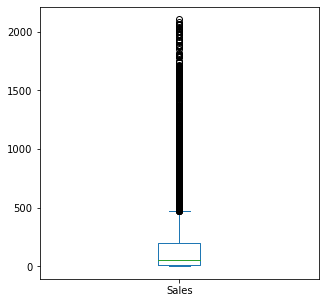

In [88]:
data_zscore.plot(kind='box', figsize=(5,5))
plt.show()

In [147]:
#handling outlier with IQR

#Q1, Q3 dan interquartile range
Q1 = superstore.quantile(q=.25)
Q3 = superstore.quantile(q=.75)
IQR = Q3-Q1 #IQR=Q3-Q1 or use stats.iqr from scipy

#take value 1.5*IQR from Qi and Q3
Sales = superstore[~((superstore < (Q1-1.5*IQR)) | (superstore > (Q3+1.5*IQR))).any(axis=1)]
Sales.shape

C:\Users\Darren\AppData\Local\Temp\ipykernel_14012\1812718628.py:9: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  Sales = superstore[~((superstore < (Q1-1.5*IQR)) | (superstore > (Q3+1.5*IQR))).any(axis=1)]


(8655, 18)

In [56]:
df_mode=superstore.fillna(superstore.mode())
#display(df_mode.to_string())
df_mode

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales
0,1,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600
1,2,CA-2017-152156,08/11/2017,11/11/2017,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400
2,3,CA-2017-138688,12/06/2017,16/06/2017,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200
3,4,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775
4,5,US-2016-108966,11/10/2016,18/10/2016,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9795,9796,CA-2017-125920,21/05/2017,28/05/2017,Standard Class,SH-19975,Sally Hughsby,Corporate,United States,Chicago,Illinois,60610.0,Central,OFF-BI-10003429,Office Supplies,Binders,"Cardinal HOLDit! Binder Insert Strips,Extra St...",3.7980
9796,9797,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,OFF-AR-10001374,Office Supplies,Art,"BIC Brite Liner Highlighters, Chisel Tip",10.3680
9797,9798,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10004977,Technology,Phones,GE 30524EE4,235.1880
9798,9799,CA-2016-128608,12/01/2016,17/01/2016,Standard Class,CS-12490,Cindy Schnelling,Corporate,United States,Toledo,Ohio,43615.0,East,TEC-PH-10000912,Technology,Phones,Anker 24W Portable Micro USB Car Charger,26.3760
